<IPython.core.display.Javascript object>


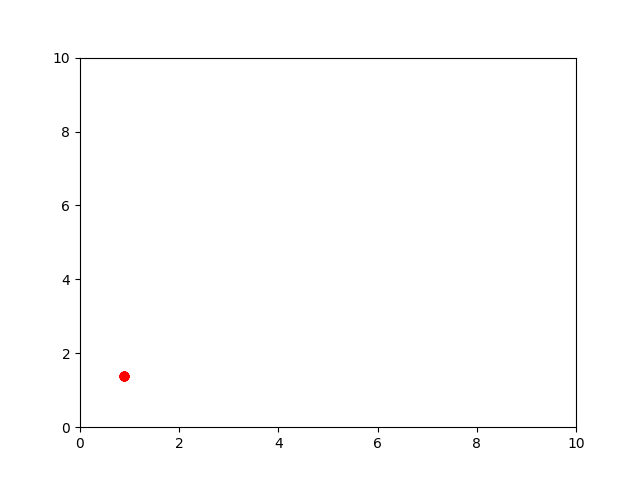

In [2]:
%matplotlib notebook
import rospy
from nav_msgs.msg import Odometry
from ros_robot_sim_pkg.msg import PlanningAction, PlanningGoal, PlanningFeedback 
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

class Visualiser:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ln, = plt.plot([], [], 'ro')
        self.x_data, self.y_data = [], []

    def plot_init(self):
        self.ax.set_xlim(0, 10)
        self.ax.set_ylim(0, 10)
        return self.ln,

    def odom_callback(self, odom_msg):
        # Append robot trajectory coordinates
        self.x_data.append(odom_msg.pose.pose.position.x)
        self.y_data.append(odom_msg.pose.pose.position.y)

    def update_plot(self, frame):
        print("Updating plot with frame:", frame)

        self.ln.set_data(self.x_data, self.y_data)
        return self.ln,

# Initialize ROS node
rospy.init_node('odom_visualizer_node')

# Initialize visualizer
vis = Visualiser()

# Subscribe to /odom topic
subscriber2 = rospy.Subscriber('/odom', Odometry, vis.odom_callback) 

# Update plot animation
ani = FuncAnimation(vis.fig, vis.update_plot, frames=None, init_func=vis.plot_init, blit=True, cache_frame_data=False)


# Display the plot
plt.show()
